In [290]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.classifier import ConfusionMatrix
import pandas as pd
import numpy as np

In [291]:
import pickle
with open('data.pkl', 'rb') as f:
  X_train, X_test, y_train, y_test = pickle.load(f)

In [292]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8362068965517241

0.8362068965517241

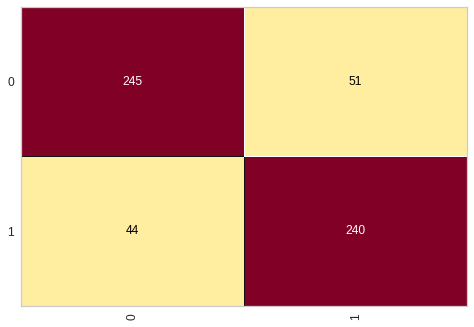

In [293]:
cm = ConfusionMatrix(clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [294]:
prev = clf.predict(X_test)
print(classification_report(y_test, prev))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       296
           1       0.82      0.85      0.83       284

    accuracy                           0.84       580
   macro avg       0.84      0.84      0.84       580
weighted avg       0.84      0.84      0.84       580



In [295]:
answers = pd.read_csv("ANSWERS.csv")
df = answers.copy()
df.head()

,ID,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY,LOAN_PURPOSE,LOAN_AMOUNT,EXISTING_SAVINGS,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,SEX,OTHERS_ON_LOAN,CURRENT_RESIDENCE_DURATION,PROPERTY,AGE,INSTALLMENT_PLANS,HOUSING,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
0,1078506,25.84,465,NO_CREDITS,CAR_NEW,250,38.35,0,1,F,NONE,2,REAL_ESTATE,32,STORES,OWN,1,3,1,0,1,TO_FILL
1,947575,-439.72,120,ALL_CREDITS_PAID_BACK,CAR_NEW,250,1.62,0,2,M,CO-APPLICANT,2,REAL_ESTATE,25,STORES,RENT,1,3,1,0,1,TO_FILL
2,133043,169.45,527,PRIOR_PAYMENTS_DELAYED,RADIO_TV,2207,184.97,6,2,M,NONE,3,SAVINGS_INSURANCE,32,STORES,OWN,2,1,2,0,1,TO_FILL
3,1031383,NO_CHECKING,720,OUTSTANDING_CREDIT,CAR_USED,5064,731.03,6,4,M,NONE,2,CAR_OTHER,49,NONE,OWN,2,3,1,0,1,TO_FILL
4,491563,NO_CHECKING,420,OUTSTANDING_CREDIT,FURNITURE,3763,396.26,4,3,F,NONE,3,CAR_OTHER,46,STORES,OWN,1,1,2,1,1,TO_FILL


In [296]:
df['INSTALLMENT_PLANS'] = df['INSTALLMENT_PLANS'].fillna('NONE')
df['LOAN_PURPOSE'] = df['LOAN_PURPOSE'].fillna('NONE')
df['OTHERS_ON_LOAN'] = df['OTHERS_ON_LOAN'].fillna('NONE')
df['PROPERTY'] = df['PROPERTY'].fillna('UNKNOWN')
df['CREDIT_HISTORY'] = df['CREDIT_HISTORY'].fillna('NO_CREDITS')
df['CHECKING_BALANCE'] = df['CHECKING_BALANCE'].fillna(0)
df['CHECKING_BALANCE'] = df['CHECKING_BALANCE'].replace('NO_CHECKING', 0)

In [297]:
df['CHECKING_BALANCE'] = pd.to_numeric(df['CHECKING_BALANCE'], errors='coerce')

In [298]:
df['EXISTING_SAVINGS'] = pd.to_numeric(df['EXISTING_SAVINGS'], errors='coerce')
df['EXISTING_SAVINGS'] = df['EXISTING_SAVINGS'].fillna(0)
df['EXISTING_SAVINGS'] = df['EXISTING_SAVINGS'].replace(0, df['EXISTING_SAVINGS'].median())

In [299]:
df.isnull().sum()

ID                            0
CHECKING_BALANCE              0
PAYMENT_TERM                  0
CREDIT_HISTORY                0
LOAN_PURPOSE                  0
LOAN_AMOUNT                   0
EXISTING_SAVINGS              0
EMPLOYMENT_DURATION           0
INSTALLMENT_PERCENT           0
SEX                           0
OTHERS_ON_LOAN                0
CURRENT_RESIDENCE_DURATION    0
PROPERTY                      0
AGE                           0
INSTALLMENT_PLANS             0
HOUSING                       0
EXISTING_CREDITS_COUNT        0
JOB_TYPE                      0
DEPENDENTS                    0
TELEPHONE                     0
FOREIGN_WORKER                0
ALLOW                         0
dtype: int64

In [300]:
le_SEX = LabelEncoder()
le_PROPERTY = LabelEncoder()
le_HOUSING = LabelEncoder()

le_INSTALLMENT_PLANS = LabelEncoder()
le_LOAN_PURPOSE = LabelEncoder()
le_OTHERS_ON_LOAN = LabelEncoder()

le_CREDIT_HISTORY = LabelEncoder()

In [301]:
df['SEX'] = le_SEX.fit_transform(df['SEX'])
df['PROPERTY'] = le_PROPERTY.fit_transform(df['PROPERTY'])
df['HOUSING'] = le_HOUSING.fit_transform(df['HOUSING'])

df['INSTALLMENT_PLANS'] = le_INSTALLMENT_PLANS.fit_transform(df['INSTALLMENT_PLANS'])
df['LOAN_PURPOSE'] = le_LOAN_PURPOSE.fit_transform(df['LOAN_PURPOSE'])
df['OTHERS_ON_LOAN'] = le_OTHERS_ON_LOAN.fit_transform(df['OTHERS_ON_LOAN'])
df['CREDIT_HISTORY'] = le_CREDIT_HISTORY.fit_transform(df['CREDIT_HISTORY'])

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          1000 non-null   int64  
 1   CHECKING_BALANCE            1000 non-null   float64
 2   PAYMENT_TERM                1000 non-null   int64  
 3   CREDIT_HISTORY              1000 non-null   int64  
 4   LOAN_PURPOSE                1000 non-null   int64  
 5   LOAN_AMOUNT                 1000 non-null   int64  
 6   EXISTING_SAVINGS            1000 non-null   float64
 7   EMPLOYMENT_DURATION         1000 non-null   int64  
 8   INSTALLMENT_PERCENT         1000 non-null   int64  
 9   SEX                         1000 non-null   int64  
 10  OTHERS_ON_LOAN              1000 non-null   int64  
 11  CURRENT_RESIDENCE_DURATION  1000 non-null   int64  
 12  PROPERTY                    1000 non-null   int64  
 13  AGE                         1000 n

In [303]:
df = df.drop(columns=['ID', 'ALLOW'])

In [304]:
X = df.values

In [305]:
X.shape

(1000, 20)

In [306]:
indexes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19]

In [307]:
X = X[:, indexes]
X.shape

(1000, 18)

In [308]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.13065073, -0.5216232 , -0.17790598, ..., -0.45897032,
        -0.83017419,  0.14998296],
       [-0.34960546, -1.51580597, -1.47176762, ..., -0.45897032,
        -0.83017419,  0.14998296],
       [-0.06311038, -0.34295847,  1.11595567, ...,  2.17879013,
        -0.83017419,  0.14998296],
       ...,
       [-0.06835426, -0.25362611, -0.8248368 , ..., -0.45897032,
        -0.83017419,  0.14998296],
       [-0.14280339,  1.50996766,  1.11595567, ..., -0.45897032,
         1.20456647,  0.14998296],
       [-0.14280339,  0.90481294,  1.11595567, ...,  2.17879013,
         1.20456647,  0.14998296]])

In [309]:
y = clf.predict(X)

In [310]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [312]:
answers['ALLOW'] = y

In [318]:
answers.to_csv('result.csv', index=False)

In [319]:
h = pd.read_csv("result.csv")
h.head()

,ID,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY,LOAN_PURPOSE,LOAN_AMOUNT,EXISTING_SAVINGS,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,SEX,OTHERS_ON_LOAN,CURRENT_RESIDENCE_DURATION,PROPERTY,AGE,INSTALLMENT_PLANS,HOUSING,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
0,1078506,25.84,465,NO_CREDITS,CAR_NEW,250,38.35,0,1,F,NONE,2,REAL_ESTATE,32,STORES,OWN,1,3,1,0,1,0
1,947575,-439.72,120,ALL_CREDITS_PAID_BACK,CAR_NEW,250,1.62,0,2,M,CO-APPLICANT,2,REAL_ESTATE,25,STORES,RENT,1,3,1,0,1,0
2,133043,169.45,527,PRIOR_PAYMENTS_DELAYED,RADIO_TV,2207,184.97,6,2,M,NONE,3,SAVINGS_INSURANCE,32,STORES,OWN,2,1,2,0,1,0
3,1031383,NO_CHECKING,720,OUTSTANDING_CREDIT,CAR_USED,5064,731.03,6,4,M,NONE,2,CAR_OTHER,49,NONE,OWN,2,3,1,0,1,0
4,491563,NO_CHECKING,420,OUTSTANDING_CREDIT,FURNITURE,3763,396.26,4,3,F,NONE,3,CAR_OTHER,46,STORES,OWN,1,1,2,1,1,0
